In [1]:
#IMPORTANT
#Code below makes sure all the code in each cell is outputted
#Code from Programming for Business Analytics Workbooks

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#IMPORTING RELEVANT PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#IMPORTING RELEVANT DATASETS

#####CHANGE dataset in read_csv for new activity category

df = pd.read_csv("03. Retail Activities Table.csv")
df.head()

,Origin,Destination,Distance (km),Duration (mins),Activity
0,Barking and Dagenham,Sainsburys Local SW11 3BX,27.3,84,Retail
1,Barking and Dagenham,Tesco Express SE13 6RT,26.1,83,Retail
2,Barking and Dagenham,Sainsburys Local W2 1HB,24.8,75,Retail
3,Barking and Dagenham,Marks and Spencer Hospital NW3 2QG,24.6,75,Retail
4,Barking and Dagenham,Budgens SE6 1TP,34.0,87,Retail


In [4]:
#DEFINING CUT-OFF TIMES AND ADJUSTMENT FACTORS (WEIGHTINGS)
#Normal (Original) Cut-off Time come from Amber and Jordan's research
#Good timing adjustment factor is based on the assumption: a good journey is half the time of a normal journey
#Bad timing adjustment factor is based on the assumption: a bad journey is double the time of a normal journey
#These adjustments are applied to the Normal Cut-off Time to get the Good and Bad Cut-off Times

#####CHANGE "norm_cutoff_time" Variable for new activity category

norm_cutoff_time = 7
good_timing_adj = 1/2
bad_timing_adj = 2

good_cutoff_time = norm_cutoff_time * good_timing_adj
bad_cutoff_time = norm_cutoff_time * bad_timing_adj

print(good_cutoff_time)
print(bad_cutoff_time)

3.5
14


In [5]:
#TOTAL COUNT OF ACTVITIES BY DURATION OF JOURNEY DATAFRAME
#Creating a dataframe of Count of Activities by Duration of Journey
#This dataframe will be visualised below to see if cut-off times selected seem reasonable

#####CHANGE name of dataframe in first line for new activity category

journey_times = df[["Destination", "Duration (mins)"]].groupby("Duration (mins)").count()
journey_times = journey_times.reset_index()
journey_times.rename(columns = {"Destination" : "Count of Activities"}, inplace="True")
journey_times.head()

,Duration (mins),Count of Activities
0,1,1
1,2,4
2,3,3
3,4,9
4,5,12


<Figure size 1152x576 with 0 Axes>

Text(8, 1000, 'Normal Cut-off Time')

Text(4.5, 1000, 'Good Cut-off Time')

Text(15, 1000, 'Bad Cut-off Time')

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Count of Activities')

Text(0.5, 1.0, 'Number of Activites by Length of Journey (mins)')

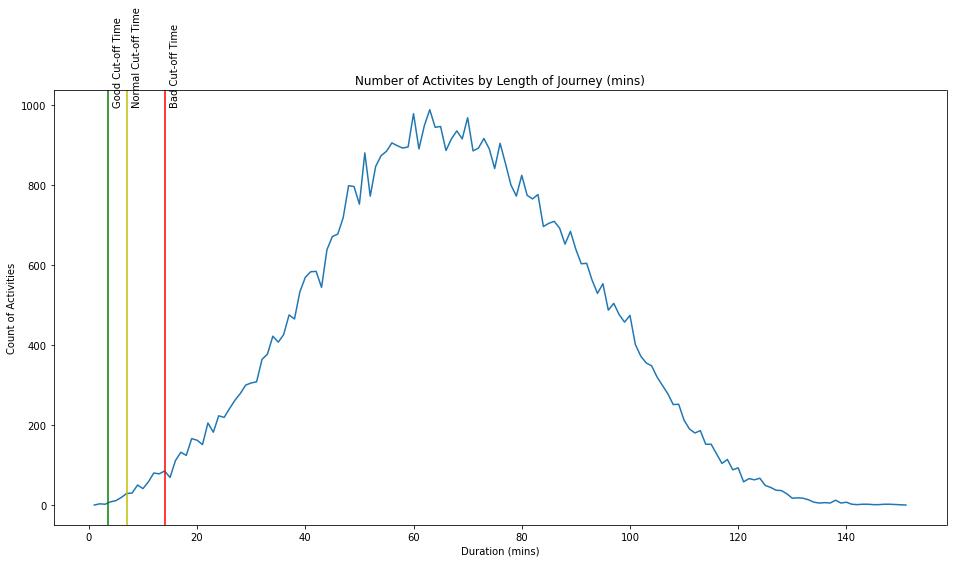

In [6]:
#TOTAL COUNT OF ACTVITIES BY DURATION OF JOURNEY GRAPH
#Graph shows how activity counts are spread across journey times
#Lines from x-axis show the proposed cut-off times

plt.figure(figsize=(16, 8))
plt.plot(journey_times["Duration (mins)"], journey_times["Count of Activities"])
plt.axvline(norm_cutoff_time, color="y", label="Normal")
plt.axvline(good_cutoff_time, color="g", label="Good")
plt.axvline(bad_cutoff_time, color="r", label="Bad")
plt.text(norm_cutoff_time+1,1000,'Normal Cut-off Time',rotation=90)
plt.text(good_cutoff_time+1,1000,'Good Cut-off Time',rotation=90)
plt.text(bad_cutoff_time+1,1000,'Bad Cut-off Time',rotation=90)
plt.xlabel('Duration (mins)')
plt.ylabel("Count of Activities")
plt.title("Number of Activites by Length of Journey (mins)")
plt.show()

In [7]:
#JOURNEY CLASSIFICATION
#Creating a new column in dataframe to classify activities by which cut off time they are within
#Journeys which are not within our Good, Normal or Bad Cut off times are classified as Out of Scope

conditions1 = [
    (df["Duration (mins)"] <= good_cutoff_time),
    (df["Duration (mins)"] <= norm_cutoff_time),
    (df["Duration (mins)"] <= bad_cutoff_time),
    (df["Duration (mins)"] > bad_cutoff_time)
]

values1 = ["Good", "Normal", "Bad", "Out of Scope"]

df["Journey Classification"] = np.select(conditions1, values1)
df.head()

,Origin,Destination,Distance (km),Duration (mins),Activity,Journey Classification
0,Barking and Dagenham,Sainsburys Local SW11 3BX,27.3,84,Retail,Out of Scope
1,Barking and Dagenham,Tesco Express SE13 6RT,26.1,83,Retail,Out of Scope
2,Barking and Dagenham,Sainsburys Local W2 1HB,24.8,75,Retail,Out of Scope
3,Barking and Dagenham,Marks and Spencer Hospital NW3 2QG,24.6,75,Retail,Out of Scope
4,Barking and Dagenham,Budgens SE6 1TP,34.0,87,Retail,Out of Scope


In [8]:
#GROUPING DATAFRAME BY ORIGIN AND JOURNEY CLASSIFICATION
#Grouping dataframe gives the count of activities for a given borough and its journey classifcation (Good, Normal, Bad and Out of Scope)

journey_classification = df[["Origin", "Destination", "Journey Classification"]].groupby(["Origin", "Journey Classification"]).count()
journey_classification = journey_classification.reset_index()
journey_classification.rename(columns = {"Destination" : "Count of Activities"}, inplace="True")
journey_classification

,Origin,Journey Classification,Count of Activities
0,Barking and Dagenham,Bad,4
1,Barking and Dagenham,Out of Scope,1784
2,Barnet,Out of Scope,1788
3,Bexley,Bad,9
4,Bexley,Normal,2
...,...,...,...
85,Wandsworth,Out of Scope,1778
86,Westminster,Bad,47
87,Westminster,Good,2
88,Westminster,Normal,6


In [9]:
#WEIGHTING COUNT OF ACTIVITIES
#Applying the adjusment factors from above so:
#Good Journeys are worth double, Bad are worth half, Out of Scope Journeys are worth 0 and Normal journeys stay constant

conditions2 = [
    (journey_classification["Journey Classification"] == "Good"),
    (journey_classification["Journey Classification"] == "Normal"),
    (journey_classification["Journey Classification"] == "Bad"),
    (journey_classification["Journey Classification"] == "Out of Scope")
]

values2 = [journey_classification["Count of Activities"]/good_timing_adj, journey_classification["Count of Activities"]*1, journey_classification["Count of Activities"]/bad_timing_adj, journey_classification["Count of Activities"]*0]

journey_classification["Weighted Count of Activities"] = np.select(conditions2, values2)
journey_classification

,Origin,Journey Classification,Count of Activities,Weighted Count of Activities
0,Barking and Dagenham,Bad,4,2.0
1,Barking and Dagenham,Out of Scope,1784,0.0
2,Barnet,Out of Scope,1788,0.0
3,Bexley,Bad,9,4.5
4,Bexley,Normal,2,2.0
...,...,...,...,...
85,Wandsworth,Out of Scope,1778,0.0
86,Westminster,Bad,47,23.5
87,Westminster,Good,2,4.0
88,Westminster,Normal,6,6.0


In [10]:
#GROUPING DATAFRAME BY BOROUGH
#Grouping dataframe by borough gives the raw accesibility score for the given activity

borough_scores = journey_classification[["Origin", "Weighted Count of Activities"]].groupby("Origin").sum()
borough_scores.rename(columns = {"Weighted Count of Activities" : "Raw Score"}, inplace="True")
borough_scores = borough_scores.reset_index()
borough_scores

,Origin,Raw Score
0,Barking and Dagenham,2.0
1,Barnet,0.0
2,Bexley,6.5
3,Brent,3.5
4,Bromley,0.0
5,Camden,15.0
6,City of London,47.0
7,Croydon,4.5
8,Ealing,2.5
9,Enfield,7.5


In [11]:
#REBASING BOROUGH SCORES
#Raw scores are based according to the the highest borough score
#This ensures the values for scores are from 0 to 100

max_score = max(borough_scores["Raw Score"])

borough_scores["Rebased Score"] = (borough_scores["Raw Score"]/max_score) * 100
borough_scores = borough_scores.sort_values("Rebased Score")
borough_scores

,Origin,Raw Score,Rebased Score
1,Barnet,0.0,0.000000
4,Bromley,0.0,0.000000
26,Richmond upon Thames,1.0,2.127660
16,Hillingdon,1.5,3.191489
14,Harrow,2.0,4.255319
0,Barking and Dagenham,2.0,4.255319
8,Ealing,2.5,5.319149
20,Kingston upon Thames,3.0,6.382979
30,Waltham Forest,3.5,7.446809
3,Brent,3.5,7.446809


In [12]:
#ASSIGNING GRADES
#Boroughs are given grades based on their rebased scores:
#A+ for 90 and above
#A for 80 and above
#B for 60 and above
#C for 40 and above
#D for 20 and above
#E for 10 and above
#F for below 10

conditions3 = [
    (borough_scores["Rebased Score"] >= 90),
    (borough_scores["Rebased Score"] >= 80),
    (borough_scores["Rebased Score"] >= 60),
    (borough_scores["Rebased Score"] >= 40),
    (borough_scores["Rebased Score"] >= 20),
    (borough_scores["Rebased Score"] >= 10),
    (borough_scores["Rebased Score"] < 10),
]

values3 = ["A+", "A", "B", "C", "D", "E", "F"]

borough_scores["Grade"] = np.select(conditions3, values3)
borough_scores

,Origin,Raw Score,Rebased Score,Grade
1,Barnet,0.0,0.000000,F
4,Bromley,0.0,0.000000,F
26,Richmond upon Thames,1.0,2.127660,F
16,Hillingdon,1.5,3.191489,F
14,Harrow,2.0,4.255319,F
0,Barking and Dagenham,2.0,4.255319,F
8,Ealing,2.5,5.319149,F
20,Kingston upon Thames,3.0,6.382979,F
30,Waltham Forest,3.5,7.446809,F
3,Brent,3.5,7.446809,F


<Figure size 1152x576 with 0 Axes>

<BarContainer object of 33 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

Text(0.5, 0, 'Boroughs')

Text(0, 0.5, 'Rebased Scores')

Text(0.5, 1.0, 'Rebased Scores by Borough')

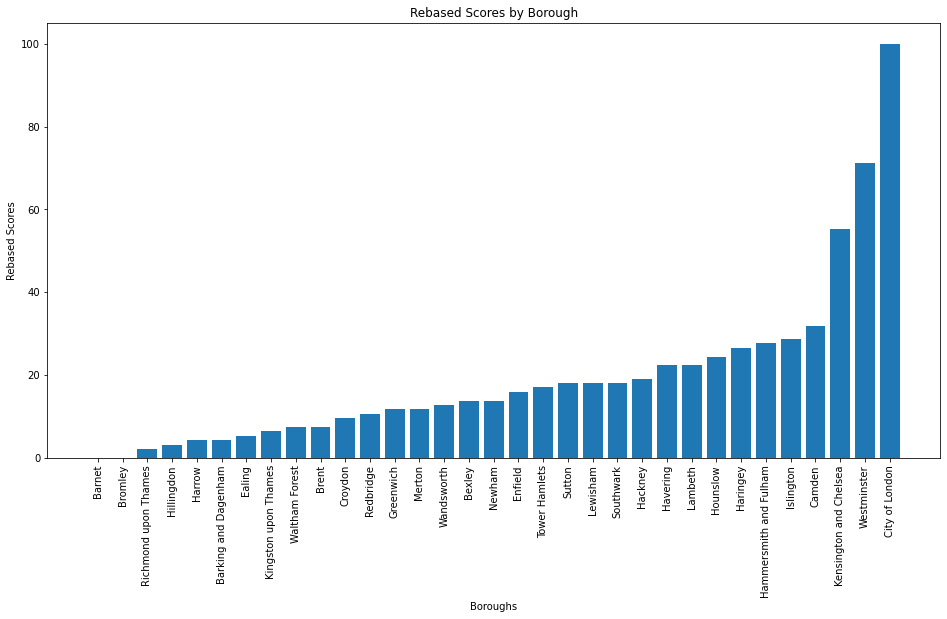

In [13]:
#VISUALISING REBASED SCORES
#Boroughs rebased scores are shown in a bar chart in ascending order

plt.figure(figsize=(16, 8))
plt.bar(borough_scores["Origin"], borough_scores["Rebased Score"])
plt.xticks(rotation=90)
plt.xlabel('Boroughs')
plt.ylabel('Rebased Scores')
plt.title('Rebased Scores by Borough')
plt.show()

In [14]:
#ADDING ACTIVITY CATEGORY
#####CHANGE "Activity Category" Column for new activity category

borough_scores["Activity Category"] = "Retail"
borough_scores.head()

,Origin,Raw Score,Rebased Score,Grade,Activity Category
1,Barnet,0.0,0.000000,F,Retail
4,Bromley,0.0,0.000000,F,Retail
26,Richmond upon Thames,1.0,2.127660,F,Retail
16,Hillingdon,1.5,3.191489,F,Retail
14,Harrow,2.0,4.255319,F,Retail


In [15]:
#SAVE AND EXPORT
#Saving the finshed dataframe
#After executing this line the file should be available on the left hand side of the screen

#####CHANGE Filename for new activity category

borough_scores.to_csv('05. Retail Index Table.csv', index=False)